In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import sys
sys.path.append("../../../")

from utils.draw_bounding_boxes import draw_bounding_box
from back_detector import BackFieldDetector

In [2]:
back_field_detector = BackFieldDetector(model='back_field_model.pt')

Model summary: 129 layers, 3,011,628 parameters, 0 gradients, 8.2 GFLOPs
Is GPU available?: False
GPU count: 0


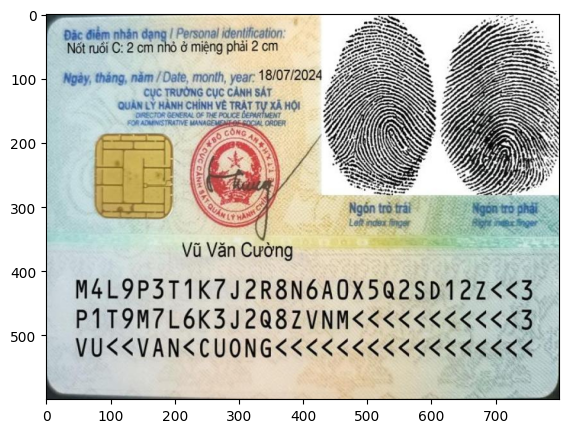

In [3]:
img = cv2.imread('test/10_jpg.rf.3fad48fb17f8c5d26dbf54bf9b8b6cd3.jpg')

plt.figure(figsize=(10, 5))
plt.imshow(img[:,:,::-1]) 
plt.show()

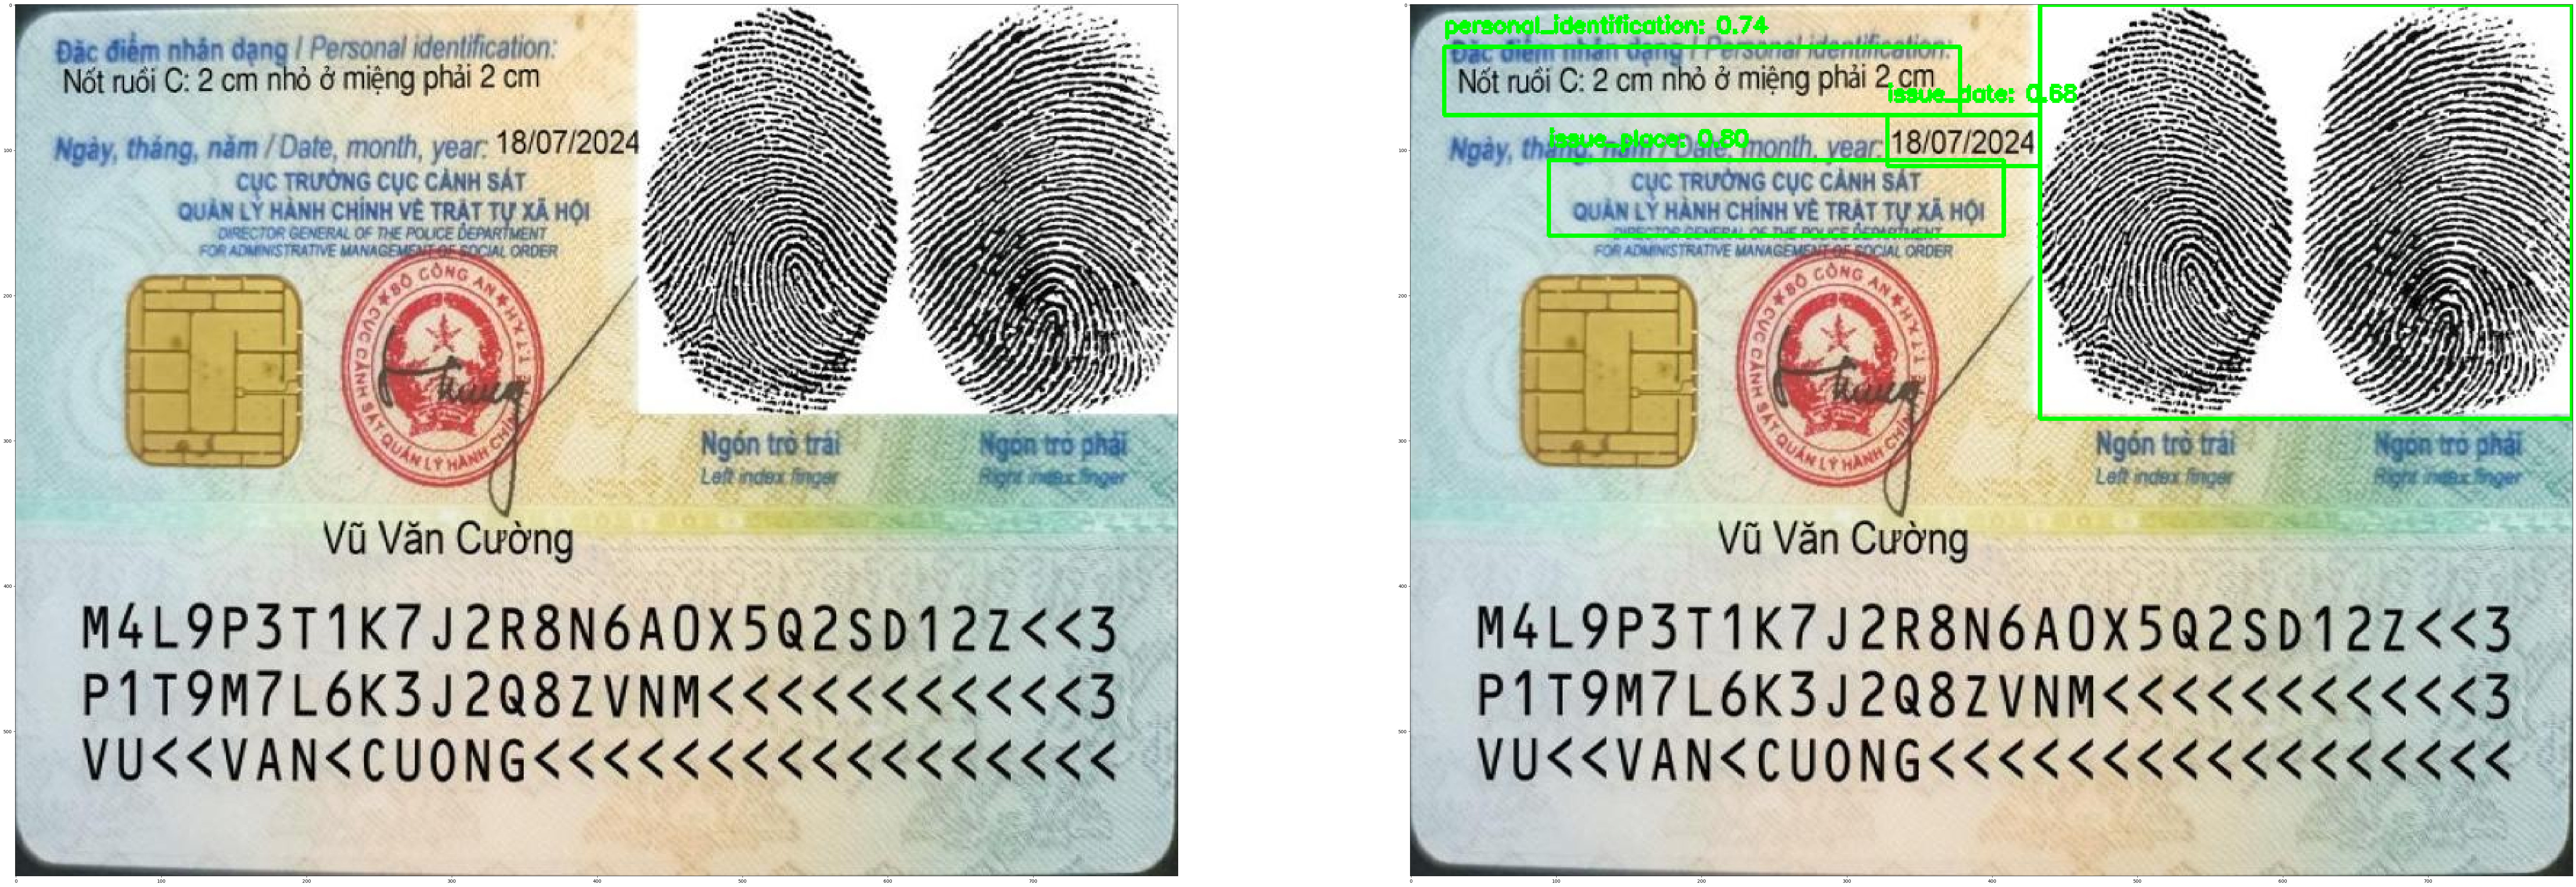

In [4]:
copied_img = img.copy()
back_field_results = back_field_detector.predict(copied_img)
drawed_bounding_box_img = draw_bounding_box(back_field_results[0], copied_img, back_field_detector)

plt.figure(figsize=(100, 50))
plt.subplot(1, 2, 1)
plt.imshow(copied_img[:,:,::-1]) 

plt.subplot(1, 2, 2)
plt.imshow(drawed_bounding_box_img[:,:,::-1])
plt.show()

issue_date
issue_place
personal_identification


<Figure size 1200x800 with 0 Axes>

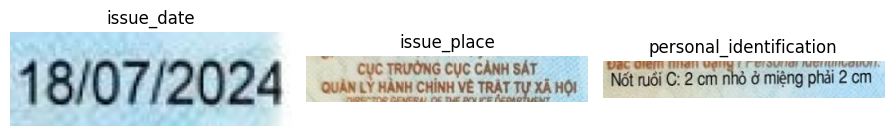

In [5]:
plt.figure(figsize=(12, 8))

class_names = [
    'fingerprint',
    'issue_date',
    'issue_place',
    'personal_identification'
]

def extract_field_images(detector, img):
    results = detector.predict(img)
    boxes = results[0].boxes.data
    boxes = sorted(boxes, key=lambda box: (box[5], box[1], box[0]))
    crops = []
    
    for box in boxes[1:]:
        x1, y1, x2, y2, confidence, class_id = map(int, box[:6])
        crop = img[y1:y2, x1:x2]
        crops.append({ "class_name": class_names[class_id], "field_img": crop })
    return crops
    
crops = extract_field_images(back_field_detector, img.copy())

plt.figure(figsize=(12, 8))
for idx, crop in enumerate(crops):
    plt.subplot(3, 4, idx + 1)
    print(crop["class_name"])
    plt.imshow(crop['field_img'])
    plt.title(crop["class_name"])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [6]:
%cd ../ocr_idcard/

from idcard_translator import IdCardTranslator
translator = IdCardTranslator()
back_info = translator.read_back_info(crops)

c:\Users\UUN6HC\Desktop\CV_Project\src\modules\ocr_idcard


c:\Users\UUN6HC\Desktop\CV_Project\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
c:\Users\UUN6HC\Desktop\CV_Project\.venv\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight C:\Users\UUN6HC\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


In [7]:
issue_places = [
    "CỤC TRƯỞNG CỤC CẢNH SÁT QUẢN LÝ HÀNH CHÍNH VỀ TRẬT TỰ XÃ HỘI",
    "GIÁM ĐỐC CÔNG AN THÀNH PHỐ HÀ NỘI",
    "GIÁM ĐỐC CÔNG AN TỈNH HÀ GIANG",
    "GIÁM ĐỐC CÔNG AN TỈNH CAO BẰNG",
    "GIÁM ĐỐC CÔNG AN TỈNH BẮC KẠN",
    "GIÁM ĐỐC CÔNG AN TỈNH TUYÊN QUANG",
    "GIÁM ĐỐC CÔNG AN TỈNH LÀO CAI",
    "GIÁM ĐỐC CÔNG AN TỈNH ĐIỆN BIÊN",
    "GIÁM ĐỐC CÔNG AN TỈNH LAI CHÂU",
    "GIÁM ĐỐC CÔNG AN TỈNH SƠN LA",
    "GIÁM ĐỐC CÔNG AN TỈNH YÊN BÁI",
    "GIÁM ĐỐC CÔNG AN TỈNH HOÀ BÌNH",
    "GIÁM ĐỐC CÔNG AN TỈNH THÁI NGUYÊN",
    "GIÁM ĐỐC CÔNG AN TỈNH LẠNG SƠN",
    "GIÁM ĐỐC CÔNG AN TỈNH QUẢNG NINH",
    "GIÁM ĐỐC CÔNG AN TỈNH BẮC GIANG",
    "GIÁM ĐỐC CÔNG AN TỈNH PHÚ THỌ",
    "GIÁM ĐỐC CÔNG AN TỈNH VĨNH PHÚC",
    "GIÁM ĐỐC CÔNG AN TỈNH BẮC NINH",
    "GIÁM ĐỐC CÔNG AN TỈNH HẢI DƯƠNG",
    "GIÁM ĐỐC CÔNG AN THÀNH PHỐ HẢI PHÒNG",
    "GIÁM ĐỐC CÔNG AN TỈNH HƯNG YÊN",
    "GIÁM ĐỐC CÔNG AN TỈNH THÁI BÌNH",
    "GIÁM ĐỐC CÔNG AN TỈNH HÀ NAM",
    "GIÁM ĐỐC CÔNG AN TỈNH NAM ĐỊNH",
    "GIÁM ĐỐC CÔNG AN TỈNH NINH BÌNH",
    "GIÁM ĐỐC CÔNG AN TỈNH THANH HOÁ",
    "GIÁM ĐỐC CÔNG AN TỈNH NGHỆ AN",
    "GIÁM ĐỐC CÔNG AN TỈNH HÀ TĨNH",
    "GIÁM ĐỐC CÔNG AN TỈNH QUẢNG BÌNH",
    "GIÁM ĐỐC CÔNG AN TỈNH QUẢNG TRỊ",
    "GIÁM ĐỐC CÔNG AN TỈNH THỪA THIÊN HUẾ",
    "GIÁM ĐỐC CÔNG AN THÀNH PHỐ ĐÀ NẴNG",
    "GIÁM ĐỐC CÔNG AN TỈNH QUẢNG NAM",
    "GIÁM ĐỐC CÔNG AN TỈNH QUẢNG NGÃI",
    "GIÁM ĐỐC CÔNG AN TỈNH BÌNH ĐỊNH",
    "GIÁM ĐỐC CÔNG AN TỈNH PHÚ YÊN",
    "GIÁM ĐỐC CÔNG AN TỈNH KHÁNH HOÀ",
    "GIÁM ĐỐC CÔNG AN TỈNH NINH THUẬN",
    "GIÁM ĐỐC CÔNG AN TỈNH BÌNH THUẬN",
    "GIÁM ĐỐC CÔNG AN TỈNH KON TUM",
    "GIÁM ĐỐC CÔNG AN TỈNH GIA LAI",
    "GIÁM ĐỐC CÔNG AN TỈNH ĐẮK LẮK",
    "GIÁM ĐỐC CÔNG AN TỈNH ĐẮK NÔNG",
    "GIÁM ĐỐC CÔNG AN TỈNH LÂM ĐỒNG",
    "GIÁM ĐỐC CÔNG AN TỈNH BÌNH PHƯỚC",
    "GIÁM ĐỐC CÔNG AN TỈNH TÂY NINH",
    "GIÁM ĐỐC CÔNG AN TỈNH BÌNH DƯƠNG",
    "GIÁM ĐỐC CÔNG AN TỈNH ĐỒNG NAI",
    "GIÁM ĐỐC CÔNG AN TỈNH BÀ RỊA - VŨNG TÀU",
    "GIÁM ĐỐC CÔNG AN THÀNH PHỐ HỒ CHÍ MINH",
    "GIÁM ĐỐC CÔNG AN TỈNH LONG AN",
    "GIÁM ĐỐC CÔNG AN TỈNH TIỀN GIANG",
    "GIÁM ĐỐC CÔNG AN TỈNH BẾN TRE",
    "GIÁM ĐỐC CÔNG AN TỈNH TRÀ VINH",
    "GIÁM ĐỐC CÔNG AN TỈNH VĨNH LONG",
    "GIÁM ĐỐC CÔNG AN TỈNH ĐỒNG THÁP",
    "GIÁM ĐỐC CÔNG AN TỈNH AN GIANG",
    "GIÁM ĐỐC CÔNG AN TỈNH KIÊN GIANG",
    "GIÁM ĐỐC CÔNG AN THÀNH PHỐ CẦN THƠ",
    "GIÁM ĐỐC CÔNG AN TỈNH HẬU GIANG",
    "GIÁM ĐỐC CÔNG AN TỈNH SÓC TRĂNG",
    "GIÁM ĐỐC CÔNG AN TỈNH BẠC LIÊU",
    "GIÁM ĐỐC CÔNG AN TỈNH CÀ MAU"
]


In [8]:
print(len(issue_places))

64


In [9]:
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process

# best_match, score = process.extractOne(back_info['issue_place'], issue_places)

# if score >= 0.3:
#     back_info['issue_place'] = best_match

# print("Kết quả tương đồng nhất:")
# print(f"→ \"{best_match}\" (độ tương đồng: {score}%)")


# print('\nKết quả trích xuất mặt sau')
# print(back_info)

In [13]:
back_info

{'issue_date': '18/07/2024',
 'issue_place': 'CỤC TRƯỞNG CỤC CẢNH SÁT QUẢN LÝ HÀNH CHÍNH VỀ TRẬT TỰ XÃ HỘI',
 'personal_identification': 'Nót ruôi C.2 cm nhỏ ở miệng phải 2 cm'}